<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

1.ОПИСАНИЕ ДАННЫХ МАССИВА

Признаки: RowNumber — индекс строки в данных CustomerId — уникальный идентификатор клиента Surname — фамилия CreditScore — кредитный рейтинг Geography — страна проживания Gender — пол Age — возраст Tenure — сколько лет человек является клиентом банка Balance — баланс на счёте NumOfProducts — количество продуктов банка, используемых клиентом HasCrCard — наличие кредитной карты IsActiveMember — активность клиента EstimatedSalary — предполагаемая зарплата

Целевой признак: Exited — факт ухода клиента

## Подготовка данных

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import joblib 
import optuna 
from optuna.samplers import TPESampler

from sklearn import metrics
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

!pip install scikit-plot
import scikitplot as skplt


In [9]:
try:
    data = pd.read_csv('/datasets/Churn.csv')
                       
except:
                       
    data = pd.read_csv('C:/Users/анатолий/Documents/datasets/Churn.csv')
data=data.rename(columns=str.lower)#  названия столбцов перевели в строковый    
print(data.shape)    
data.head()


(10000, 14)


rownumber  customerid   surname  creditscore geography  gender  age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   tenure    balance  numofproducts  hascrcard  isactivemember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   estimatedsalary  exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [10]:
data=data.drop(['rownumber','customerid','surname'],axis=1)
data.info()
print(data.dtypes)
data.isna().sum()
display(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           9091 non-null   float64
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB
creditscore          int64
geography           object
gender              object
age                  int64
tenure             float64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember

creditscore geography  gender  age  tenure    balance  numofproducts  \
0          619    France  Female   42     2.0       0.00              1   
1          608     Spain  Female   41     1.0   83807.86              1   
2          502    France  Female   42     8.0  159660.80              3   
3          699    France  Female   39     1.0       0.00              2   
4          850     Spain  Female   43     2.0  125510.82              1   

   hascrcard  isactivemember  estimatedsalary  exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

ИТАК видим 3 признака object фамилия,страна проживания и пол. В столбце с временем продолжительности нахождения в качестве клиента банка 909 пропущенных значений(~ 10% )  и их заполним медианой посмотрим как изменится тип данных.Остальные столбцы int и float.  Посмотрим дисбаланс классов .Поработаем с кодированием категориальных признаков

In [11]:
data['tenure'] = data['tenure'].fillna(data['tenure'].median())# заполним пропуски медианой

display(data.head())
print(data.isna().sum())
data.info()

#for column in data.columns:
 #   if data[column].dtype == 'object':# смотрим столбцы с категориальными данными
  #      print('Столбцы с категориальными данными:',column)

types = pd.DataFrame(data.dtypes)
print('Столбцы с категориальными данными:\n',list(types[types[0] == 'object'].index) )       

creditscore geography  gender  age  tenure    balance  numofproducts  \
0          619    France  Female   42     2.0       0.00              1   
1          608     Spain  Female   41     1.0   83807.86              1   
2          502    France  Female   42     8.0  159660.80              3   
3          699    France  Female   39     1.0       0.00              2   
4          850     Spain  Female   43     2.0  125510.82              1   

   hascrcard  isactivemember  estimatedsalary  exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  float64
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usa

КОММЕНТАРИЙ СТУДЕНТА:
Стараюсь ничего не удалять без крайней необходимости,а здесь как никак почти 10% данных можно потерять 
при удалении.Медиана мне кажется более "безобиднее" и точнее здесь для заполнения,чем среднее значение.
Если бы заполнил средним то скорее всего мало бы что изменилось при таком достаточно большом размере данных.

Видим два столбца с категориальными данными geography и  gender,пропусков не осталось,тип данных логичен 
и дисбаланс в количестве меток 7963 к 2037.
Далее займемся с категориальными данными и разобъем датасет на три выборки.

In [12]:
data_ohe = pd.get_dummies(data,drop_first=True)
#print(data_ohe.head(3))

for column in data_ohe.columns:
    if data_ohe[column].dtype == 'object':# смотрим столбцы с категориальными данными
        print(column)    
print("Категориальных данных нет")
# выделим признаки и целевой показатель
features = data_ohe.drop(['exited'],axis=1)
target = data_ohe['exited']

# оставим для теста 25% выборки а оставшиеся 75% разобьем на тренировочную и валидационную
features_train1,features_test,target_train1,target_test =\
                                                     train_test_split(features,target,\
                                                        test_size = 0.25,random_state = 12345,\
                                                                     stratify=target)
features_train,features_valid,target_train,target_valid =train_test_split(features_train1,target_train1,\
                                                                        test_size = 0.25,random_state = 12345,\
                                                                         stratify=target_train1)
print()
print('Размер валидационной выборки',features_valid.shape, target_valid.shape)
print('Размер тренировочной выборки',features_train.shape, target_train.shape)
print('Размер тренировочной выборки до разделения на валидационную',features_train1.shape, target_train1.shape)
print('Размер тестовой выборки',features_test.shape, target_test.shape)    # с размерностями ОК


Категориальных данных нет

Размер валидационной выборки (1875, 11) (1875,)
Размер тренировочной выборки (5625, 11) (5625,)
Размер тренировочной выборки до разделения на валидационную (7500, 11) (7500,)
Размер тестовой выборки (2500, 11) (2500,)


## Исследование задачи

                       Модель LogisticRegression

In [14]:
#         Подберем гиперпараметры для LogisticRegression модели

pipe_log=make_pipeline(StandardScaler(),LogisticRegression(random_state=12345))

param_grid ={'logisticregression__C': [0.01,0.1,1.0],'logisticregression__penalty':['l1','l2','elasticnet']}
grid = GridSearchCV(pipe_log, param_grid,cv=5,n_jobs=1,scoring='f1')
grid=grid.fit(features_train,target_train)
print('Лучшая мера f1 модели на обучающей выборке:{:.2f}'.format(grid.best_score_))
print('Лучший параметр регуляризации и пенальти на обучающей выборке:',grid.best_params_)

Лучшая мера f1 модели на обучающей выборке:0.32
Лучший параметр регуляризации и пенальти на обучающей выборке: {'logisticregression__C': 1.0, 'logisticregression__penalty': 'l2'}


In [15]:
%%time
# здесь больше параметров и данные не стандартизированы
pipe_log=make_pipeline(StandardScaler(),LogisticRegression(random_state=12345))
param_grid = {
              "penalty": ["l1", "l2"],
              "C" :[0.01,0.1,1.0] ,
              "fit_intercept": [True, False],
              
              "solver": ["liblinear", "saga"]
             }

grid = GridSearchCV(LogisticRegression(multi_class="auto", max_iter=10), param_grid, cv=5)

grid = grid.fit(features_train, target_train)

grid.best_params_



Wall time: 3.08 s


{'C': 0.1, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}

In [16]:

prediction = grid.predict(features_test)
print('f1 : ',f1_score(target_test,prediction))

f1 :  0.27950310559006214


In [17]:
%%time
#               OPTUNA
def objective(trial):
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    tol = trial.suggest_float("tol", 0.0001, 0.01, log=True)
    C = trial.suggest_float("C", 1.0, 10.0, log=True)
    intercept = trial.suggest_categorical("fit_intercept", [True, False])
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])

    ## Create Model
    classifier = LogisticRegression(penalty=penalty,
                                    tol=tol,
                                    C=C,
                                    fit_intercept=intercept,
                                    solver=solver,
                                    multi_class="auto",
                                   )
    ## Fit Model
    classifier.fit(features_train, target_train)

    return classifier.score(features_test, target_test)

Wall time: 0 ns


In [18]:
%%time

study = optuna.create_study(study_name="LogisticRegression", direction="maximize")
study.optimize(objective, n_trials=15)

[I 2022-06-27 10:25:41,596] A new study created in memory with name: LogisticRegression
[I 2022-06-27 10:25:41,658] Trial 0 finished with value: 0.812 and parameters: {'penalty': 'l1', 'tol': 0.00013673373182906208, 'C': 9.17949788370423, 'fit_intercept': False, 'solver': 'liblinear'}. Best is trial 0 with value: 0.812.
[I 2022-06-27 10:25:41,700] Trial 1 finished with value: 0.786 and parameters: {'penalty': 'l2', 'tol': 0.00024865192089991016, 'C': 5.2847421070186815, 'fit_intercept': False, 'solver': 'liblinear'}. Best is trial 0 with value: 0.812.
[I 2022-06-27 10:25:41,937] Trial 2 finished with value: 0.7964 and parameters: {'penalty': 'l2', 'tol': 0.006328628766192451, 'C': 2.8241457204090397, 'fit_intercept': True, 'solver': 'saga'}. Best is trial 0 with value: 0.812.
[I 2022-06-27 10:25:42,013] Trial 3 finished with value: 0.8124 and parameters: {'penalty': 'l1', 'tol': 0.0006215956157407651, 'C': 8.636970432240547, 'fit_intercept': True, 'solver': 'liblinear'}. Best is trial 

Wall time: 1.94 s


In [19]:
print("Best Params : {}".format(study.best_params))

print("\nBest Accuracy : {}".format(study.best_value))

Best Params : {'penalty': 'l1', 'tol': 0.006734464896135209, 'C': 3.772021677746858, 'fit_intercept': False, 'solver': 'liblinear'}

Best Accuracy : 0.816


In [20]:
classifier = LogisticRegression(**study.best_params, multi_class="auto")

classifier.fit(features_train, target_train)

print("Logistic Regression Accuracy on Train Dataset : {}".format(classifier.score(features_train, target_train)))
print("Logistic Regression Accuracy on Test  Dataset : {}".format(classifier.score(features_test, target_test)))
prediction = classifier.predict(features_test)
print('f1 : ',f1_score(target_test,prediction))

Logistic Regression Accuracy on Train Dataset : 0.8133333333333334
Logistic Regression Accuracy on Test  Dataset : 0.8128
f1 :  0.2523961661341853


In [13]:
%%time

study.optimize(objective, n_trials=10)
print("Best Params : {}".format(study.best_params))

print("\nBest Accuracy : {}".format(study.best_value))

[I 2022-06-19 07:19:52,483] Trial 15 finished with value: 0.8128 and parameters: {'penalty': 'l1', 'tol': 0.00019269878563534827, 'C': 3.715000500085424, 'fit_intercept': True, 'solver': 'liblinear'}. Best is trial 12 with value: 0.8128.
[I 2022-06-19 07:19:52,609] Trial 16 finished with value: 0.8132 and parameters: {'penalty': 'l1', 'tol': 0.00018985587022401595, 'C': 6.61096471791679, 'fit_intercept': True, 'solver': 'liblinear'}. Best is trial 16 with value: 0.8132.
[I 2022-06-19 07:19:52,726] Trial 17 finished with value: 0.8128 and parameters: {'penalty': 'l1', 'tol': 0.00010018628507733335, 'C': 6.589412058337764, 'fit_intercept': True, 'solver': 'liblinear'}. Best is trial 16 with value: 0.8132.
[I 2022-06-19 07:19:52,805] Trial 18 finished with value: 0.788 and parameters: {'penalty': 'l2', 'tol': 0.00012479136315527578, 'C': 6.5874252971350336, 'fit_intercept': False, 'solver': 'liblinear'}. Best is trial 16 with value: 0.8132.
[I 2022-06-19 07:19:52,926] Trial 19 finished wi

Best Params : {'penalty': 'l1', 'tol': 0.00018985587022401595, 'C': 6.61096471791679, 'fit_intercept': True, 'solver': 'liblinear'}

Best Accuracy : 0.8132
Wall time: 1.4 s


In [21]:
%%time

study.optimize(objective, n_trials=10)# нужно смотреть улучшаются ли старые испытания 

[I 2022-06-27 10:26:25,520] Trial 15 finished with value: 0.812 and parameters: {'penalty': 'l1', 'tol': 0.0014553937611270207, 'C': 2.947810786171666, 'fit_intercept': False, 'solver': 'liblinear'}. Best is trial 8 with value: 0.816.
[I 2022-06-27 10:26:25,568] Trial 16 finished with value: 0.8148 and parameters: {'penalty': 'l1', 'tol': 0.0043018112176241045, 'C': 4.513026809014112, 'fit_intercept': False, 'solver': 'liblinear'}. Best is trial 8 with value: 0.816.
[I 2022-06-27 10:26:25,632] Trial 17 finished with value: 0.8136 and parameters: {'penalty': 'l1', 'tol': 0.0055078879844185965, 'C': 2.490427329933395, 'fit_intercept': False, 'solver': 'liblinear'}. Best is trial 8 with value: 0.816.
[I 2022-06-27 10:26:25,694] Trial 18 finished with value: 0.8132 and parameters: {'penalty': 'l1', 'tol': 0.0024582334036579857, 'C': 1.6699493224898085, 'fit_intercept': True, 'solver': 'liblinear'}. Best is trial 8 with value: 0.816.
[I 2022-06-27 10:26:25,744] Trial 19 finished with value:

Wall time: 538 ms


In [22]:
classifier = LogisticRegression(**study.best_params, multi_class="auto")

classifier.fit(features_train, target_train)

print("Logistic Regression Accuracy on Train Dataset : {}".format(classifier.score(features_train, target_train)))
print("Logistic Regression Accuracy on Test  Dataset : {}".format(classifier.score(features_train, target_train)))

Logistic Regression Accuracy on Train Dataset : 0.816
Logistic Regression Accuracy on Test  Dataset : 0.816


In [23]:
optuna.visualization.plot_optimization_history(study)

<AxesSubplot:title={'center':'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

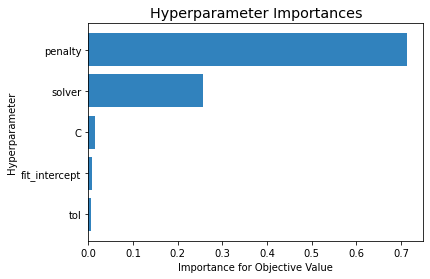

In [24]:
optuna.visualization.matplotlib.plot_param_importances(study)

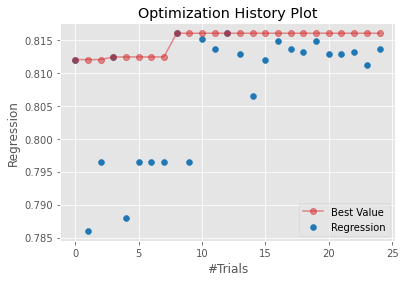

In [25]:
optuna.visualization.matplotlib.plot_optimization_history(study, target_name="Regression");

In [26]:
#    проверка модели на валидационной выборке
pipe_lr = make_pipeline(StandardScaler(),LogisticRegression(random_state=12345,C=1.0,penalty='l2'))
pipe_lr = pipe_lr.fit(features_train,target_train)
predictions_test_log = pipe_lr.predict(features_test)
print('Мера f1 модели LogisticRegression(random_state=12345,C=1,penalty=l2 на test выборке:{:.2f}'\
      .format(f1_score(target_test,\
                            predictions_test_log)))

Мера f1 модели LogisticRegression(random_state=12345,C=1,penalty=l2 на test выборке:0.32


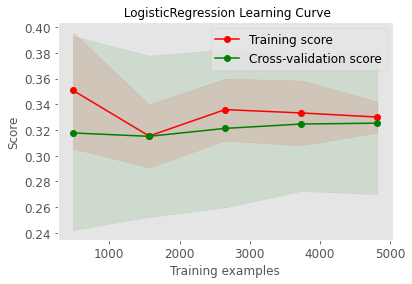

In [29]:
import scikitplot as skplt

skplt.estimators.plot_learning_curve(pipe_lr,features_train,target_train ,
                                     cv=7, shuffle=True, scoring="f1",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title=" LogisticRegression Learning Curve");

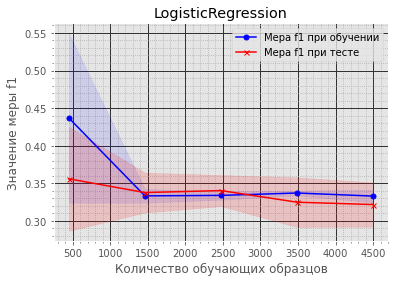

In [28]:
#        Построим кривую обучения 

pipe_lr_learn=make_pipeline(StandardScaler(),
                     LogisticRegression(penalty='l2',C=1.0,             
                                       random_state=12345,
                                       
                                       max_iter=10000,))

train_sizes,train_scores,test_scores=learning_curve(  
                                                  estimator=pipe_lr_learn,
                                                  X=features_train,y=target_train,
    train_sizes=np.linspace(0.1,1.0,5),# 5 интервалов для размеров долей обучающих образцов от 0,1 до 1 
                                                  cv=5,n_jobs=1,scoring='f1')
                                                      
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)       
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1) 

plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='Мера f1 при обучении')
plt.fill_between(train_sizes,train_mean + train_std,
                             train_mean - train_std,
                            alpha=0.1,color='blue')
plt.plot(train_sizes,test_mean,color='red',linestyle='-',marker='x',markersize=5,\
         label='Мера f1 при тесте');
plt.fill_between(train_sizes,test_mean + test_std,
                             test_mean - test_std,
                            alpha=0.15,color='red');

plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('LogisticRegression')
plt.xlabel('Количество обучающих образцов')
plt.ylabel('Значение меры f1')
plt.legend(loc='best');

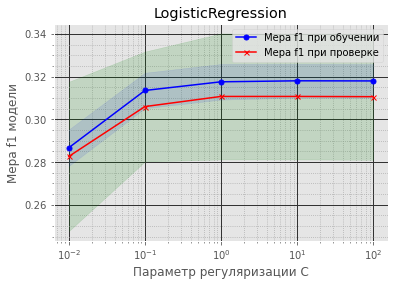

In [31]:
#            Строим кривую проверки.
param_range=[0.01,0.1,1.0,10.0,100]# обратный параметр регуляризации
pipe_lr_val=make_pipeline(StandardScaler(),
                     LogisticRegression(penalty='l2',# l2 это регуляризация
                                       random_state=12345,
                                       
                                       max_iter=10000))
train_scores,test_scores=validation_curve(
                                         estimator=pipe_lr_val,
                                         X=features,y=target,
                                         param_name='logisticregression__C', 
                                         param_range=param_range,cv=5,scoring='f1')
    
train_mean=np.mean(train_scores,axis=1)# вычисление средней f1 
train_std=np.std(train_scores,axis=1) #это  сренеквадратичное отклонение средней f1 
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1) # .std это стандартное отклонение 

plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='Мера f1 при обучении')
plt.fill_between(param_range,train_mean + train_std,
                             train_mean - train_std,
                            alpha=0.1,color='blue')
plt.plot(param_range,test_mean,color='red',linestyle='-',marker='x',markersize=5,\
         label='Мера f1 при проверке');
plt.fill_between(param_range,test_mean + test_std,
                             test_mean - test_std,
                            alpha=0.15,color='green');
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.xscale('log')
plt.title('LogisticRegression')
plt.xlabel('Параметр регуляризации С')
plt.ylabel('Мера f1 модели')
plt.legend(loc='best');

In [71]:
print(classification_report(target_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1991
           1       0.68      0.16      0.25       509

    accuracy                           0.81      2500
   macro avg       0.75      0.57      0.57      2500
weighted avg       0.79      0.81      0.76      2500



ИТАК:
Лучшая мера f1 модели на обучающей выборке:0.32
Лучший параметр регуляризации и пенальти на обучающей выборке: C=10,penalty: 'l2'}
Мера f1 модели LogisticRegression(random_state=12345,C=10,penalty=l2) на valid выборке:0.31
Логистическую регрессию отбросим из рассмотрения в виду малости меры f1.
Кривая проверки для LogisticRegression показывает что размера выборки достаточно,но повысить значение
меры f1 не получится на этой модели.
Параметр С=10 обратной регуляризации дает максимум меры f1 и видим большую погрешность на кривой проверки.
Может модель так и называется потому как здесь прям все логично 

               Модель  DecisionTreeClassifier

In [45]:
#                 Оценим значение f1 для DecisionTreeClassifier
f_score = []
for depth in range(1,11):
    model_tree = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model_tree.fit(features_train,target_train)
    predictions_valid = model_tree.predict(features_valid)
    f_score.append(f1_score(target_valid,predictions_valid))
    print('Мера баланса между PRE и REC (f1) при глубине дерева=',depth,': {:.2f}'\
            .format(f1_score(y_true=target_valid,y_pred=predictions_valid)))
print()
print('Максимальная мера f1 модели: {:.2f}'.format(max(f_score)))

Мера баланса между PRE и REC (f1) при глубине дерева= 1 : 0.00
Мера баланса между PRE и REC (f1) при глубине дерева= 2 : 0.48
Мера баланса между PRE и REC (f1) при глубине дерева= 3 : 0.47
Мера баланса между PRE и REC (f1) при глубине дерева= 4 : 0.49
Мера баланса между PRE и REC (f1) при глубине дерева= 5 : 0.51
Мера баланса между PRE и REC (f1) при глубине дерева= 6 : 0.51
Мера баланса между PRE и REC (f1) при глубине дерева= 7 : 0.54
Мера баланса между PRE и REC (f1) при глубине дерева= 8 : 0.54
Мера баланса между PRE и REC (f1) при глубине дерева= 9 : 0.55
Мера баланса между PRE и REC (f1) при глубине дерева= 10 : 0.53

Максимальная мера f1 модели: 0.55


КОММЕНТАРИЙ СТУДЕНТА:
Ведь деревья тем и хороши.что им наверное лучше работается когда данные не масштабированы в отличии от логистической регресии где надо чтоб среднее гуляло возле нуля и с единицей стандартного отклонения.
Да и в учебниках читал что по этой причине для деревьев нет необходимости как то менять разброс величин в данных.

Задавая в цикле разные значения глубины дерева определили,что при model_tree = DecisionTreeClassifier(random_state=12345,max_depth=9) получили:
Максимальная мера f1 модели DecisionTreeClassifier: на valid выборке: 0.55

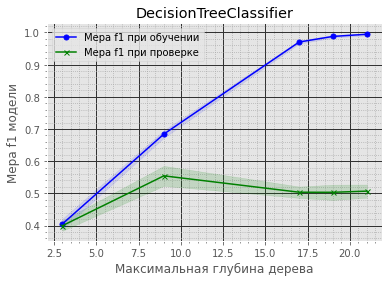

In [46]:
#         Строим кривую проверки
param_range =[3,9,17,19,21]
pipe_dt_val=make_pipeline(DecisionTreeClassifier(random_state=12345))
                     
                           
train_scores,test_scores=validation_curve(
                                         estimator=pipe_dt_val,
                                         X=features,y=target,
                                         param_name='decisiontreeclassifier__max_depth',
                                         param_range=param_range,cv=5,scoring='f1')
    
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1) 
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)  

plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='Мера f1 при обучении')
plt.fill_between(param_range,train_mean + train_std,
                             train_mean - train_std,
                            alpha=0.1,color='blue')
plt.plot(param_range,test_mean,color='green',linestyle='-',marker='x',markersize=5,\
                 label='Мера f1 при проверке')
plt.fill_between(param_range,test_mean + test_std,
                             test_mean - test_std,
                 
                            alpha=0.15,color='green')
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('DecisionTreeClassifier')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Мера f1 модели')
plt.legend(loc='best');                 

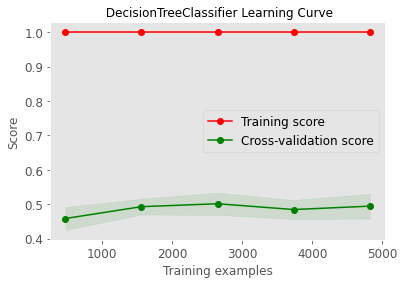

In [47]:
skplt.estimators.plot_learning_curve(DecisionTreeClassifier(random_state=12345),features_train,target_train ,
                                     cv=7, shuffle=True, scoring="f1",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title=" DecisionTreeClassifier Learning Curve");

Здесь при больших глубинах дерева  схождения никогда не увидим у модели.
Для DecisionTreeClassifier размер выборки достаточен и возможности увеличить меру f1 не получится дажу
если подсобрать еще данных.


              Модель RandomForestClassifier

In [48]:
#        Параметр  модели RandomForestClassifier определим с помощью GridSearchCV

pipe_total=make_pipeline(RandomForestClassifier(random_state=12345))
                    
param_grid ={'randomforestclassifier__n_estimators':[25,75,95]}
grid = GridSearchCV(pipe_total, param_grid,cv=5,#refit=True,\
                    n_jobs=-1,scoring='f1')
grid=grid.fit(features,target)

print('Лучшая f1 модели на обучающей выборке:{:.2f}'.format(grid.best_score_))
print('Лучший параметр количества деревьев на обучающей выборке:',grid.best_params_)
print('Лучшая выбранная модель:',grid.best_estimator_)
                         

Лучшая f1 модели на обучающей выборке:0.59
Лучший параметр количества деревьев на обучающей выборке: {'randomforestclassifier__n_estimators': 95}
Лучшая выбранная модель: Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(n_estimators=95, random_state=12345))])


In [49]:
# set different parameter values to tune
rf_classifier = RandomForestClassifier(n_jobs=-1,random_state=12345)
param_grid = {
    "n_estimators": [25, 75, 95],
    "max_depth": [1, 3, 5,],
    "criterion": ["gini", "entropy"]}

# set gridsearch
model = GridSearchCV(
    estimator=rf_classifier, param_grid=param_grid,scoring='f1', cv=5, verbose=2, n_jobs=1)
    


In [50]:
model.fit(features,target)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .......criterion=gini, max_depth=1, n_estimators=25; total time=   0.1s
[CV] END .......criterion=gini, max_depth=1, n_estimators=25; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=25; total time=   0.1s
[CV] END .......criterion=gini, max_depth=1, n_estimators=25; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=25; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=75; total time=   0.2s
[CV] END .......criterion=gini, max_depth=1, n_estimators=75; total time=   0.2s
[CV] END .......criterion=gini, max_depth=1, n_estimators=75; total time=   0.3s
[CV] END .......criterion=gini, max_depth=1, n_estimators=75; total time=   0.3s
[CV] END .......criterion=gini, max_depth=1, n_estimators=75; total time=   0.2s
[CV] END .......criterion=gini, max_depth=1, n_estimators=95; total time=   0.3s
[CV] END .......criterion=gini, max_depth=1, n_e

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=12345),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5], 'n_estimators': [25, 75, 95]},
             scoring='f1', verbose=2)

In [51]:
print('Лучшая метрика f1 для модели',(model.best_score_).round(3))
print('Лучшая модель и лучшие гиперпараметры',model.best_estimator_.get_params()) 
print('Лучшие параметры модели:',model.best_params_)
print('Лучшая выбранная модель:',model.best_estimator_)

Лучшая метрика f1 для модели 0.498
Лучшая модель и лучшие гиперпараметры {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_jobs': -1, 'oob_score': False, 'random_state': 12345, 'verbose': 0, 'warm_start': False}
Лучшие параметры модели: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 25}
Лучшая выбранная модель: RandomForestClassifier(max_depth=5, n_estimators=25, n_jobs=-1,
                       random_state=12345)


In [52]:
#случайный поиск RandomizedSearchCV
rfr_classifier = RandomForestClassifier(n_jobs=-1) 
# set different parameter values to tune
param_grid = {
    "n_estimators": [25, 75, 95],
    "max_depth": [1, 3, 5],
    "criterion": ["gini", "entropy"],
}
# set gridsearch
model_r = RandomizedSearchCV(
    estimator=rfr_classifier, param_distributions=param_grid,n_iter=19,scoring='f1', cv=5, verbose=2, n_jobs=1,random_state=12345)



In [53]:
model_r.fit(features,target)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .......criterion=gini, max_depth=1, n_estimators=25; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=25; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=25; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=25; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=25; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=75; total time=   0.3s
[CV] END .......criterion=gini, max_depth=1, n_estimators=75; total time=   0.2s
[CV] END .......criterion=gini, max_depth=1, n_estimators=75; total time=   0.2s
[CV] END .......criterion=gini, max_depth=1, n_estimators=75; total time=   0.2s
[CV] END .......criterion=gini, max_depth=1, n_estimators=75; total time=   0.2s
[CV] END .......criterion=gini, max_depth=1, n_estimators=95; total time=   0.3s
[CV] END .......criterion=gini, max_depth=1, n_e

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=19,
                   n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 3, 5],
                                        'n_estimators': [25, 75, 95]},
                   random_state=12345, scoring='f1', verbose=2)

In [54]:
print('Лучшая метрика f1 для модели',(model_r.best_score_).round(3))
print('Лучшая модель и лучшие гиперпараметры',model_r.best_estimator_.get_params()) 
print('Лучшие параметры модели:',model_r.best_params_)
print('Лучшая выбранная модель:',model_r.best_estimator_)

Лучшая метрика f1 для модели 0.485
Лучшая модель и лучшие гиперпараметры {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 75, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Лучшие параметры модели: {'n_estimators': 75, 'max_depth': 5, 'criterion': 'gini'}
Лучшая выбранная модель: RandomForestClassifier(max_depth=5, n_estimators=75, n_jobs=-1)


In [58]:
# print the best score and estimator 
print(model_r.best_score_)
print(model_r.best_estimator_.get_params())

0.48476643757043825
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 75, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [60]:
# define the search space and the objecive function


def objective(trial):
    # Define the search space
    criterions = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depths = trial.suggest_int('max_depth', 1, 5, 1)
    n_estimators = trial.suggest_int('n_estimators', 25, 115, 35)

    clf = RandomForestClassifier(n_estimators=n_estimators,
                                 criterion=criterions,
                                 max_depth=max_depths,
                                 n_jobs=-1)
    f1 = cross_val_score(clf,features,target,scoring="f1").mean()

    return f1

In [61]:
# create a study object 

study = optuna.create_study(study_name="randomForest_optimization",
                            direction="maximize",
                            sampler=TPESampler())

[I 2022-06-27 10:55:58,320] A new study created in memory with name: randomForest_optimization


In [62]:
# pass the objective function to method optimize()

study.optimize(objective, n_trials=10)

[I 2022-06-27 10:56:06,799] Trial 0 finished with value: 0.13089221337356427 and parameters: {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 95}. Best is trial 0 with value: 0.13089221337356427.
[I 2022-06-27 10:56:07,675] Trial 1 finished with value: 0.2104624986818419 and parameters: {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 25}. Best is trial 1 with value: 0.2104624986818419.
[I 2022-06-27 10:56:09,122] Trial 2 finished with value: 0.0 and parameters: {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 60}. Best is trial 1 with value: 0.2104624986818419.
[I 2022-06-27 10:56:10,938] Trial 3 finished with value: 0.0 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'n_estimators': 95}. Best is trial 1 with value: 0.2104624986818419.
[I 2022-06-27 10:56:11,768] Trial 4 finished with value: 0.4740197466257592 and parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 25}. Best is trial 4 with value: 0.4740197466257592.
[I 2022-06-27 10:56:14,1

In [63]:
print(study.best_params)

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 25}


In [64]:
print(study.best_value)

0.4740197466257592


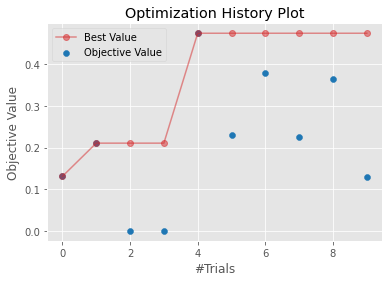

In [65]:
optuna.visualization.matplotlib.plot_optimization_history(study);

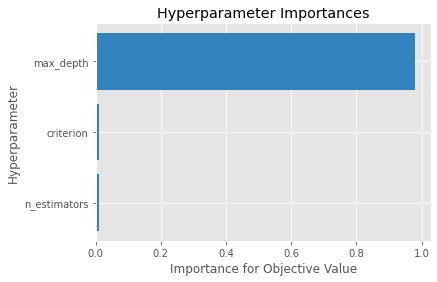

In [66]:
optuna.visualization.matplotlib.plot_param_importances(study);

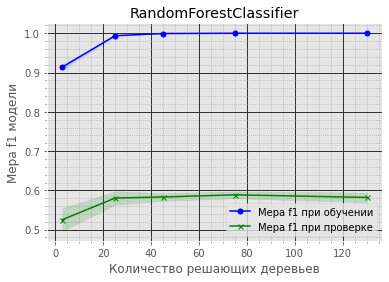

In [68]:
#    Построим кривую проверки как функцию  f1 от n_estimators 
param_range=[3,25,45,75,130]# максимальная глубина дерева
pipe_rf_val=make_pipeline(RandomForestClassifier(random_state=12345))
                     
                           
train_scores,test_scores=validation_curve(
                                         estimator=pipe_rf_val,
                                         X=features_train,y=target_train,
                                         param_name='randomforestclassifier__n_estimators',
                                         param_range=param_range,cv=5,scoring='f1')
    
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1) 
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)  

plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='Мера f1 при обучении')
plt.fill_between(param_range,train_mean + train_std,
                             train_mean - train_std,
                            alpha=0.1,color='blue')
plt.plot(param_range,test_mean,color='green',linestyle='-',marker='x',markersize=5,\
         label='Мера f1 при проверке');
plt.fill_between(param_range,test_mean + test_std,
                             test_mean - test_std,
                            alpha=0.15,color='green');
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('RandomForestClassifier')
plt.xlabel('Количество решающих деревьев')
plt.ylabel('Мера f1 модели')
plt.legend(loc='best')


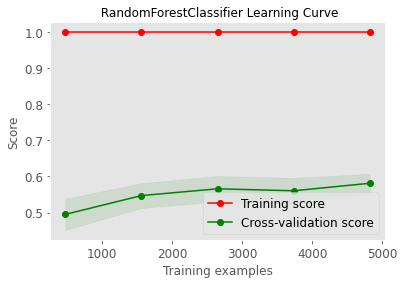

In [69]:
skplt.estimators.plot_learning_curve(RandomForestClassifier(random_state=12345),features_train,target_train ,
                                     cv=7, shuffle=True, scoring="f1",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title=" RandomForestClassifier Learning Curve");

In [70]:
# посчитаем меру f1 на валидационной выборке для выбранной модели

model_random = RandomForestClassifier(random_state=12345,n_estimators=95)

predictions_valid_random = model_random.fit(features_train,target_train).predict(features_valid)

print('Мера f1 модели на valid выборке: {:.2f}'.format(f1_score(y_true=target_valid,\
                                                                y_pred=predictions_valid_random)))


Мера f1 модели на valid выборке: 0.56


Итак для модели RandomForestClassifier:
Лучшая f1 модели на обучающей выборке:0.59
Лучший параметр количества деревьев на обучающей выборке:n_estimators': 95
Лучшая выбранная модель: RandomForestClassifier(n_estimators=95, random_state=12345)

По кривой обучения видим что максимум значения f1 можно достич при n_estimators = 75
и оценив возможности модели на валидационной выборке для количества деревьев 75 получили,что

Мера f1 модели на valid выборке: 0.56
Таким образом,для достижения значения f1=0.59 исправим ситуация с дисбалансом классов.

## Борьба с дисбалансом

Распределение меток классов
 0    7963
1    2037
Name: exited, dtype: int64


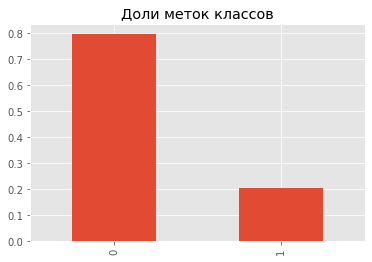

In [81]:
class_frequency = data['exited'].value_counts()
print('Распределение меток классов\n',class_frequency)
target.value_counts(normalize='true').plot(kind='bar',grid=True,title='Доли меток классов');

In [83]:
#         расчет метрик с дисбалансом классов

print('Перед применением метода кол-во меток со значением 1: {}'.format(sum(target_train == True)))
print('Перед применением метода кол-во меток со значением 0: {}'.format(sum(target_train == False)))
model_random = RandomForestClassifier(random_state=12345,n_estimators=25)
predictions_test_random = model_random.fit(features_train,target_train).predict(features_test)

print('recall : {:.2f}'.format(recall_score(y_true=target_test,\
                                                                y_pred=predictions_test_random)))
print('precision : {:.2f}'.format(precision_score(y_true=target_test,\
                                                                y_pred=predictions_test_random)))

print('  f1  : {:.2f}'.format(f1_score(y_true=target_test,\
                                                                y_pred=predictions_test_random)))
print(classification_report(target_test, predictions_test_random))

Перед применением метода кол-во меток со значением 1: 1146
Перед применением метода кол-во меток со значением 0: 4479
recall : 0.48
precision : 0.72
  f1  : 0.58
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1991
           1       0.72      0.48      0.58       509

    accuracy                           0.86      2500
   macro avg       0.80      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500



In [84]:
# посмотрим наши данные сделав балансировку
from sklearn.utils import resample
from sklearn.utils import shuffle

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled
features_upsampled, target_upsampled = upsample(features_train1, target_train1, 4)
print()
print('Сбалансированное число образцов класса 1:',features_upsampled[target_upsampled == 1].shape[0])
print('Сбалансированное число образцов класса 0:',features_upsampled[target_upsampled == 0].shape[0])


Сбалансированное число образцов класса 1: 6112
Сбалансированное число образцов класса 0: 5972


In [85]:
model_rf = RandomForestClassifier(random_state=12345,n_estimators=175)

predictions_test_rf = model_rf.fit(features_upsampled, target_upsampled).predict(features_test)

print('Мера f1 модели на сбалансированной обучающей выборке и проверке на тестовой: {:.2f}'.format\
                                (f1_score(y_true=target_test,y_pred=predictions_test_rf)))

Мера f1 модели на сбалансированной обучающей выборке и проверке на тестовой: 0.60


Видим,  мера f1 модели RandomForestClassifier(random_state=12345,n_estimators=175) на сбалансированных обучающих данных и предсказанная для тестовой выборки равна 0.60.

На сбалансированной выборке модель RandomForestClassifier() дает более высокие значения меры f1 но и требуется большое количество решающих деревьев и времени.

Итак значение f1=0.60 ТЗ считаем выполнено.

Попробуем другой метод устраниения дисбаланса и рассчитаем после выравнивания классов метрику f1  используя уже кросс-валидацию.

In [86]:
features_resampled = resample(features_train1[target_train1==1],\
                              n_samples=features_train1[target_train1==0].shape[0],\
                              random_state=12345)

features_ = np.concatenate((features_train1[target_train1==0], features_resampled))
target_ = np.concatenate((target_train1[target_train1==0], np.ones(shape=\
                                            (features_train1[target_train1==0].shape[0],),\
                                                dtype=np.int64)))
print('Количество признаков с меткой  0 :',features_[target_==0].shape[0])
print('Количество признаков с меткой  1 :',features_[target_==1].shape[0])
# используем CV метод
model_rf_bal = RandomForestClassifier(random_state=12345,n_estimators=175)#   здесь надо думать и искать скорее крос не подходит
model_rf_bal.fit(features_,target_)
f1_cv = cross_val_score(model_rf_bal,features_test,target_test,cv=7,scoring='f1')

print('Среднее значение меры f1 при cv=7 пакетах перекрестной проверки: {:.2f}'.format(f1_cv.mean())) 

Количество признаков с меткой  0 : 5972
Количество признаков с меткой  1 : 5972
Среднее значение меры f1 при cv=7 пакетах перекрестной проверки: 0.57


In [73]:
#       Расчет метрик после балансировки классов методом SMOTE(повышение до большего)
from imblearn.over_sampling import SMOTE
smt = SMOTE()
features_smote, target_smote = smt.fit_resample(features_train, target_train)
print('После применения метода SMOTE кол-во меток со значением 1: {}'.format(sum(target_smote == True)))
print('После применения метода SMOTE кол-во меток со значением 0: {}'.format(sum(target_smote == False)))
model_smote = RandomForestClassifier(random_state=12345,n_estimators=25)
predictions_smote = model_smote.fit(features_smote,target_smote).predict(features_test)
print('recall : {:.2f}'.format(recall_score(y_true=target_test,\
                                                                y_pred=predictions_smote)))
print('precision : {:.2f}'.format(precision_score(y_true=target_test,\
                                                                y_pred=predictions_smote)))
print('   f1  : {:.2f}'.format(f1_score(y_true=target_test,\
                                                                y_pred=predictions_smote)))


После применения метода SMOTE кол-во меток со значением 1: 4479
После применения метода SMOTE кол-во меток со значением 0: 4479
recall : 0.60
precision : 0.53
   f1  : 0.56


In [87]:
print(classification_report(target_test, predictions_smote))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1991
           1       0.53      0.60      0.56       509

    accuracy                           0.81      2500
   macro avg       0.71      0.73      0.72      2500
weighted avg       0.82      0.81      0.81      2500



In [77]:
#   Расчет метрик после балансировки классов методом NearMiss(с понижением до меньшего класса)
from imblearn.under_sampling import NearMiss

nm = NearMiss()
features_train_miss, target_train_miss = nm.fit_resample(features_train, target_train)
print('После применения метода NearMiss кол-во меток со значением 1: {}'.format(sum(target_train_miss == True)))
print('После применения метода NearMiss кол-во меток со значением 0: {}'.format(sum(target_train_miss == False)))

model_miss = RandomForestClassifier(random_state=12345,n_estimators=25)
predictions_miss = model_miss.fit(features_train_miss,target_train_miss).predict(features_test)
print('recall : {:.2f}'.format(recall_score(y_true=target_test,\
                                                                y_pred=predictions_miss)))
print('precision : {:.2f}'.format(precision_score(y_true=target_test,\
                                                                y_pred=predictions_miss)))
print('   f1  : {:.2f}'.format(f1_score(y_true=target_test,\
                                                                y_pred=predictions_miss)))
print()
print(classification_report(target_test, predictions_miss))

После применения метода NearMiss кол-во меток со значением 1: 1146
После применения метода NearMiss кол-во меток со значением 0: 1146
recall : 0.88
precision : 0.26
   f1  : 0.40

              precision    recall  f1-score   support

           0       0.92      0.36      0.52      1991
           1       0.26      0.88      0.40       509

    accuracy                           0.47      2500
   macro avg       0.59      0.62      0.46      2500
weighted avg       0.79      0.47      0.50      2500



Получили такое же значение метрики и на кроссвалидации с количеством пакетов CV=5 Среднее значение меры f1 при cv=5 пакетах перекрестной проверки: 0.59.

Но способ балансировки по коду короче и выравнивает все прям в ноль - запомнил и буду его использовать.

Определение важности признаков для модели RandomForestClassifier

[0.13315324 0.24481659 0.07943822 0.1469047  0.13473976 0.01775508
 0.03989457 0.14067572 0.02798093 0.01427576 0.02036544]


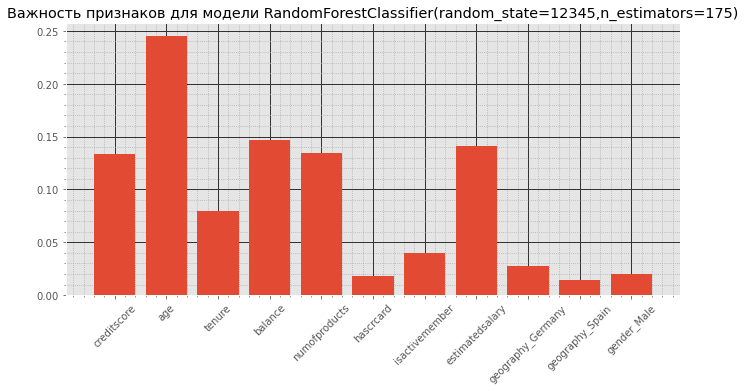

In [88]:
#           Определение важности признаков
print(model_rf .feature_importances_)
plt.figure(figsize=(11,5));
plt.bar(features.columns,model_rf .feature_importances_);
plt.xticks(rotation=45);
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True);
plt.title('Важность признаков для модели RandomForestClassifier(random_state=12345,n_estimators=175)');

 Пару тройку признаков можно отбросить,но это уже в других проектах попробую.

## Тестирование модели

Матрица неточностей для тестовой выборке : [[1847  144]
 [ 226  283]]

Мера правильности прогноза accuracy: 0.85
Мера баланса между PRE и REC (f1): 0.60
Мера точности прогноза (PRE): 0.66
Мера полноты прогноза (REC): 0.56


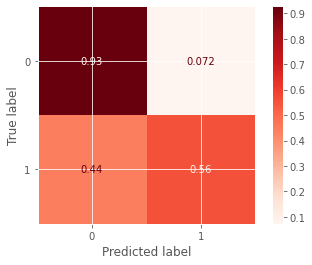

In [89]:
#          вычисление матрицы неточностей как эффективности алгоритма train 
confmat=confusion_matrix(y_true=target_test,y_pred=predictions_test_rf)
print('Матрица неточностей для тестовой выборке :',  confmat)
plot_confusion_matrix(estimator=model_rf, X=features_test, y_true=target_test,\
                     normalize='true', cmap='Reds');
print()
print('Мера правильности прогноза accuracy: {:.2f}'.format(accuracy_score(target_test,\
                                                                            predictions_test_rf)))
print('Мера баланса между PRE и REC (f1): {:.2f}'.format(f1_score(y_true=target_test,\
                                                                  y_pred=predictions_test_rf)))
print('Мера точности прогноза (PRE): {:.2f}'.format(precision_score(y_true=target_test,\
                                                                    y_pred=predictions_test_rf)))
print('Мера полноты прогноза (REC): {:.2f}'.format(recall_score(y_true=target_test,\
                                                                y_pred=predictions_test_rf)))

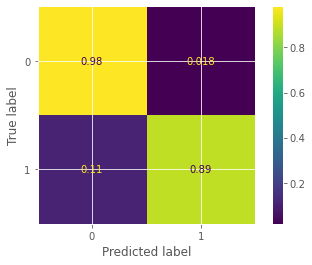

In [90]:
#      Матрица неточностей на всей выборке
plot_confusion_matrix(estimator=model_rf, X=features, y_true=target,\
                     normalize='true');


ИТАК:
Мера правильности (accuracy) модели в 0.85 показала долю правильных прогнозов в общем количестве прогнозов (TP+TN)/(FP+FN+TP+FP).
Мера точности (PRE) модели в 0.66 показала долю истинно-положительных прогнозов в общем количестве положительных прогнозов = TP/(TP+FN)-очень странная мера  ведь увеличивая точность прогноза мы уменьшаем долю положительных прогнозов,определенных как FN.
Мера полноты (REC) модели в 0.56 это есть доля истинно положительных прогнозов из общей совокупности положительно предсказанных прогнозов и равна TP/(FP+TP)-мера которую надо оптимизировать,если стоит задача повысить ТР прогнозов,но повышая эту меру мы увеличиваем и значение FP прогнозов.
Поэтому надо найти компромисс для каждой задачи что хотим увидеть и для этого определяем меру f1 
и в этой модели она получилась равной 0,60.
Из матрицы неточностей вычисленной выбранной моделью для всего датасета  видим 98% истинно-отрицательных прогнозов и 89% истинно-положительных.
Но на тестовой выборке наша модель дает по положительному классу достаточно скромный результат - и в чем подвох еще пока не разобрался и вопрос стоит ли тогда рассматривать матрицу неточностей по все выборке как нужную метрику  ????
Всего 1.8% положительных прогнозов были определены как отрицательные и 11% отрицательных прогнозов 
спрогнозировались  как положительные.
На тестовой выборке модель хорошо отработала по отрицательному классу и почти поровну (с разницей 12%) по положительному классу.

Построим кривую ROC

Для модели RandomForestClassifier (n_estimators=175): мера ROC AUC= 0.86


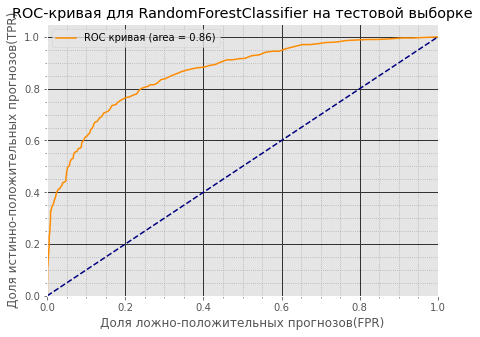

In [93]:
lr_probs = model_rf.predict_proba(features_test)# получаем предказания

lr_probs = lr_probs[:, 1]# сохраняем вероятности только для положительного исхода
# рассчитываем ROC AUC для тестовой выборки
lr_auc = roc_auc_score(target_test, lr_probs)
print('Для модели RandomForestClassifier (n_estimators=175): мера ROC AUC= {:.2f}'.format(lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(target_test, lr_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange',\
         label='ROC кривая (area = %0.2f)' % roc_auc);
plt.plot([0, 1], [0, 1], color='navy', linestyle='--');
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложно-положительных прогнозов(FPR)')
plt.ylabel('Доля истинно-положительных прогнозов(TPR)')
plt.title('ROC-кривая для RandomForestClassifier на тестовой выборке')
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.legend(loc="best");

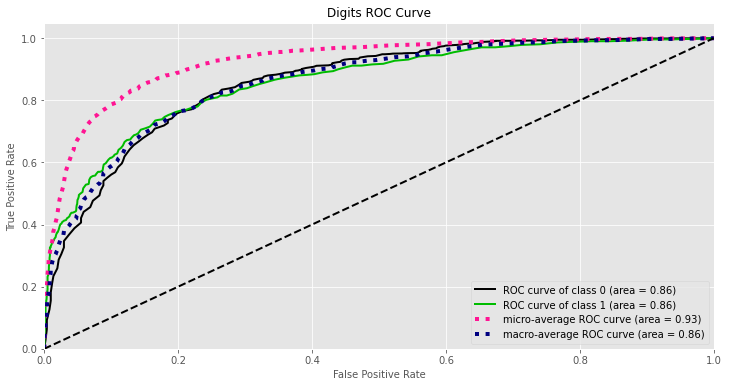

In [97]:
lr_probs = model_rf.predict_proba(features_test)

skplt.metrics.plot_roc_curve(target_test, lr_probs,
                       title="Digits ROC Curve", figsize=(12,6));

ROC кривая в каждой точке дает отношение TPR к FPR но не как просто доля такого отношения, а как вероятность прогноза определения  соотношения долей TPR И FPR и площадь под кривой дает интегральную
вероятность того что доля TP прогнозов превалирует над долей FP прогнозов.И полученное значение 
меры ROC AUC= 0.86 говорит о хорошей эффективности модели гораздо большей чем 0,5.


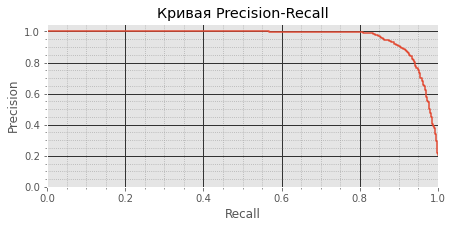

In [95]:
#        Создадим кривую Кривая Precision-Recall
from sklearn.metrics import precision_recall_curve
probabilities_valid = model_rf.predict_proba(features)
precision, recall, thresholds = precision_recall_curve(target, probabilities_valid[:, 1])
plt.figure(figsize=(7,3));
plt.step(recall, precision, where='post');
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('Кривая Precision-Recall');


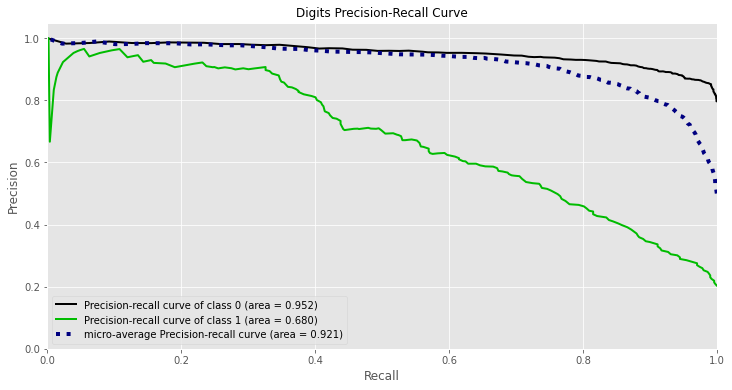

In [98]:
skplt.metrics.plot_precision_recall_curve(target_test, lr_probs,
                       title="Digits Precision-Recall Curve", figsize=(12,6));

Кривая Precision-Recall здесь рассчитана нашей моделью также на всей выборке.

Калибровочная кривая подходит для сравнения производительности различных моделей, а также для понимания того, какое пороговое значение для определения метки класса приводит к переподготовке или недоподготовке модели. Точки в различных модельных линиях, которые находятся выше пунктирной линии, перегружены, а одна ниже пунктирной линии подогнана. Нам нужна модель, где точки в основном находятся вблизи пунктирной линии.

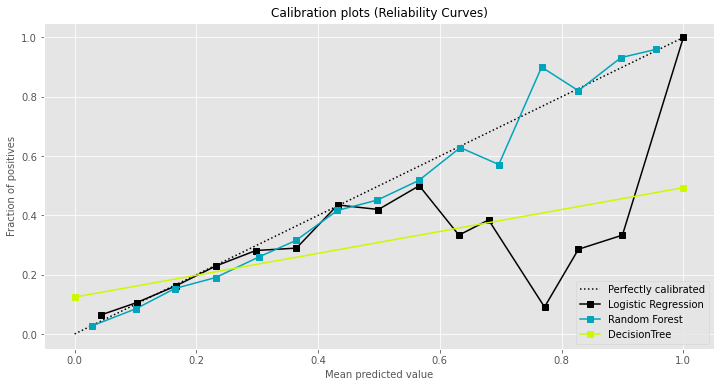

In [99]:
lr_probas = LogisticRegression().fit(features_train, target_train).predict_proba(features_test)
rf_probas = RandomForestClassifier().fit(features_train, target_train).predict_proba(features_test)
dt_probas = DecisionTreeClassifier().fit(features_train, target_train).predict_proba(features_test)

probas_list = [lr_probas, rf_probas,dt_probas]
clf_names = ['Logistic Regression', 'Random Forest', 'DecisionTree']
skplt.metrics.plot_calibration_curve(target_test,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     figsize=(12,6)
                                     );

KS Statistics предназначена только для задач двоичной классификации. Статистика КС (статистика Колмогорова-Смирнова) представляет собой максимальную разницу между кумулятивной истинно-положительной и кумулятивной ложноположительной скоростью. Он отражает способность модели отличать положительные ярлыки от отрицательных. График статистики KS предназначен только для задач двоичной классификации.

Мы впервые обучили случайный лесной классификатор на данных. Затем мы передали оригинальные метки тестов  и предсказали вероятности тестирования с помощью модели случайного обучения леса, чтобы построить диаграмму статистики KS.plot_ks_statistic()

In [100]:
rf = RandomForestClassifier()
rf.fit(features_train, target_train)



RandomForestClassifier()

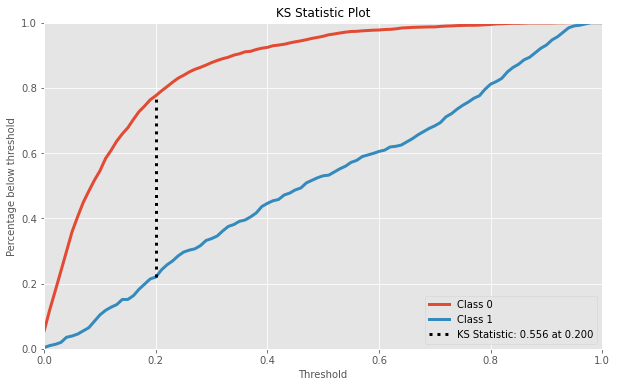

In [101]:
predict_probas = rf.predict_proba(features_test)

skplt.metrics.plot_ks_statistic(target_test, predict_probas, figsize=(10,6));

Диаграмма кумулятивного прироста говорит нам о проценте выборок в данной категории, которые были действительно предсказаны путем таргетинга на процент от общего числа выборок. Это означает, что когда мы взяли, что многие проценты выборок из общего процента, который мы получаем от кривой для оси Y, являются метками, которые действительно были угаданы моделью из общего числа образцов этого класса в таком количестве выборок. Пунктирная линия на графике является базовой кривой (модель случайного угадывания), и наша модель должна работать лучше, чем она, и обе кривые класса должны быть выше нее в идеале. Кумулятивная кривая прибыли предназначена только для задач двоичной классификации.

Нам нужно передать исходные метки данных и предсказанные вероятности обученной моделью, чтобы построить кумулятивную кривую прибыли.

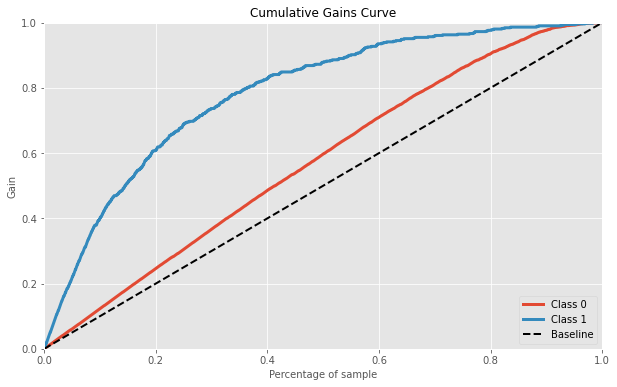

In [102]:
skplt.metrics.plot_cumulative_gain(target_test, predict_probas, figsize=(10,6));

Диаграмма точности прогнозов выводится из кумулятивной диаграммы путем взятия отношения кумулятивного прироста для каждой кривой к базовому уровню и отображения этого соотношения на оси Y. Ось X имеет то же значение, что и приведенная выше диаграмма. Кривая подъема предназначена только для задач двоичной классификации.

Нам нужно передать его исходные метки данных и предсказанные вероятности обученной моделью, чтобы построить кривую подъема.

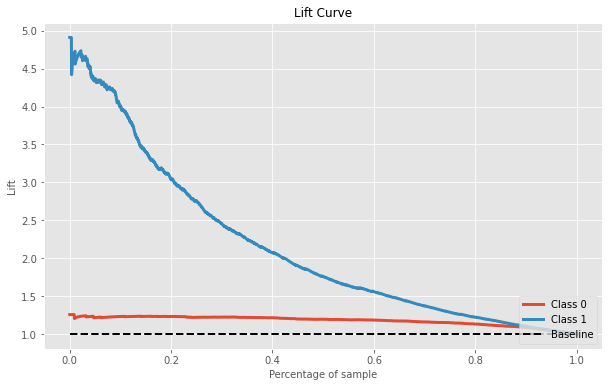

In [104]:
skplt.metrics.plot_lift_curve(target_test, predict_probas, figsize=(10,6));

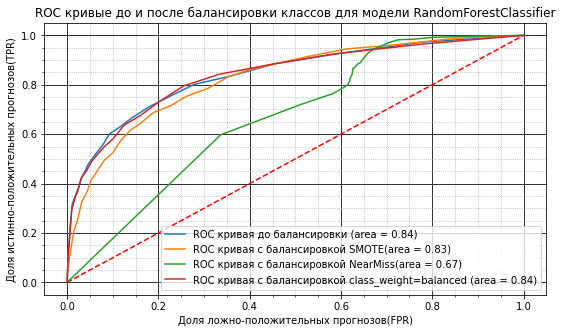

In [61]:
lr_probs = model_random.predict_proba(features_test)# получаем предказания
lr_probs = lr_probs[:, 1]# сохраняем вероятности только для положительного исхода
fpr, tpr, treshold = roc_curve(target_test, lr_probs)
roc_auc = auc(fpr, tpr)

lr_probs1 = model_smote.predict_proba(features_test)
lr_probs1 = lr_probs1[:, 1]
fpr1, tpr1, treshold1 = roc_curve(target_test, lr_probs1)
roc_auc = auc(fpr1, tpr1)

lr_probs2 = model_miss.predict_proba(features_test)
lr_probs2 = lr_probs2[:, 1]
fpr2, tpr2, treshold2 = roc_curve(target_test, lr_probs2)
roc_auc = auc(fpr2, tpr2)

model_random_balance = RandomForestClassifier(random_state=12345,n_estimators=25,class_weight='balanced',criterion='gini')
model_random_balance.fit(features_train,target_train).predict(features_test)
lr_probs3 = model_random_balance.predict_proba(features_test)
lr_probs3 = lr_probs3[:, 1]
fpr3, tpr3, treshold3 = roc_curve(target_test, lr_probs3)
roc_auc = auc(fpr3, tpr3)


fig=plt.figure(figsize=(9,5))
ax=fig.add_subplot()        
plt.plot([0, 1], [0, 1], color='red', linestyle='--');
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
ax.plot(fpr, tpr,label='ROC кривая до балансировки (area = %0.2f)' % roc_auc)
ax.plot(fpr1, tpr1,label='ROC кривая с балансировкой SMOTE(area = %0.2f)' % roc_auc1) 
ax.plot(fpr2, tpr2,label='ROC кривая с балансировкой NearMiss(area = %0.2f)' % roc_auc2)
ax.plot(fpr3, tpr3,label='ROC кривая с балансировкой class_weight=balanced (area = %0.2f)' % roc_auc3)

plt.xlabel('Доля ложно-положительных прогнозов(FPR)')
plt.ylabel('Доля истинно-положительных прогнозов(TPR)')
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.title('ROC кривые до и после балансировки классов для модели RandomForestClassifier')

plt.legend(loc="best");


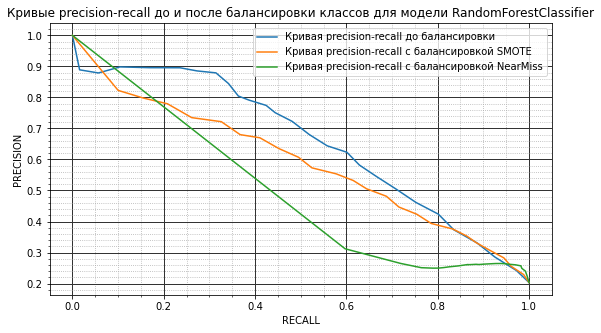

In [62]:
from sklearn.metrics import precision_recall_curve
probabilities = model_random.fit(features_train,target_train).predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(target_test, probabilities[:, 1])

probabilities_smote = model_smote.fit(features_smote,target_smote).predict_proba(features_test)
precision1, recall1, thresholds1 = precision_recall_curve(target_test, probabilities_smote[:, 1])

predictions_miss = model_miss.fit(features_train_miss,target_train_miss).predict_proba(features_test)
precision2, recall2, thresholds2 = precision_recall_curve(target_test, predictions_miss[:, 1])

fig=plt.figure(figsize=(9,5))
ax=fig.add_subplot() 
ax.plot(recall,precision,label='Кривая precision-recall до балансировки')
ax.plot(recall1,precision1,label='Кривая precision-recall с балансировкой SMOTE') 
ax.plot(recall2,precision2,label='Кривая precision-recall с балансировкой NearMiss')
plt.xlabel('RECALL')
plt.ylabel('PRECISION')
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.title('Кривые precision-recall до и после балансировки классов для модели RandomForestClassifier')
plt.legend(loc="best");

Матрица неточностей до балансировки классов : [[1897   94]
 [ 264  245]]
До балансировки f1  : 0.58
Матрица неточностей для SMOTE : [[1716  275]
 [ 196  313]]
SMOTE f1  : 0.57
Матрица модели class_weight=balanced : [[1906   85]
 [ 279  230]]
class_weight=balanced  f1  : 0.56


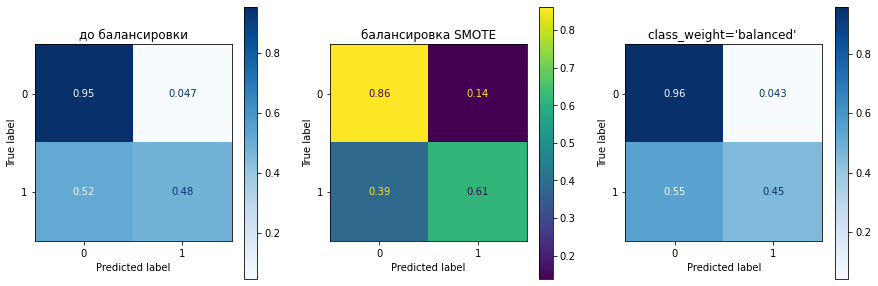

In [63]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

confmat1=confusion_matrix(y_true=target_test,y_pred=predictions_test_random)
print('Матрица неточностей до балансировки классов :',  confmat1)
print('До балансировки f1  : {:.2f}'.format(f1_score(y_true=target_test,\
                                                                y_pred=predictions_test_random)))
plot_confusion_matrix(estimator=model_random, X=features_test, y_true=target_test,\
                     normalize='true', cmap='Blues',ax=ax1);
ax1.set_title('до балансировки')

confmat2=confusion_matrix(y_true=target_test,y_pred=predictions_smote)
print('Матрица неточностей для SMOTE :',  confmat2)
print('SMOTE f1  : {:.2f}'.format(f1_score(y_true=target_test,\
                                                                y_pred=predictions_smote)))
plot_confusion_matrix(estimator=model_smote, X=features_test, y_true=target_test,\
                     normalize='true',ax=ax2);
ax2.set_title('балансиpовка SMOTE')


predictions_test_balance = model_random_balance.fit(features_train,target_train).predict(features_test)
confmat3=confusion_matrix(y_true=target_test,y_pred=predictions_test_balance)
print('Матрица модели class_weight=balanced :',  confmat3)
print('class_weight=balanced  f1  : {:.2f}'.format(f1_score(y_true=target_test,\
                                                                y_pred=predictions_test_balance)))
plot_confusion_matrix(estimator=model_random_balance, X=features_test, y_true=target_test,\
                     normalize='true', cmap='Blues',ax=ax3);
ax3.set_title("class_weight='balanced' ");

#confmat_miss=confusion_matrix(y_true=target_test,y_pred=predictions_miss)
#print('Матрица неточностей для NearMiss :',  confmat_miss)
#print(' NearMiss  f1  : {:.2f}'.format(f1_score(y_true=target_test,\
 #                                                              y_pred=predictions_miss)))
#plot_confusion_matrix(estimator=model_miss, X=features_test, y_true=target_test,\
 #                    normalize='true',cmap='Greens',ax=ax4);
#ax4.set_title('балансировка NearMiss');



Порог = 0.95 | Точность = 0.879,Мера f1 = 0.107, Полнота = 0.057


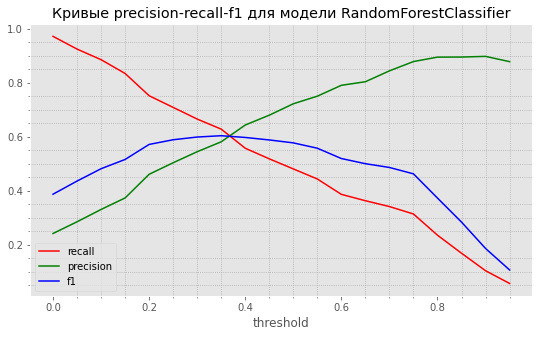

In [106]:
probabilities_test = model_random.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
precision_tot = []
recall_tot = []
f1_tot = []
threshold_tot = []
for threshold in np.arange(0, 1, 0.05):
    predicted_test = probabilities_one_test > threshold 
    precision = precision_score(target_test,predicted_test)
    recall = recall_score(target_test,predicted_test)
    f1 = f1_score(target_test,predicted_test)
    threshold_tot.append(threshold)
    precision_tot.append(precision)
    recall_tot.append(recall)
    f1_tot.append(f1)
    
print("Порог = {:.2f} | Точность = {:.3f},Мера f1 = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision,f1, recall))
    
fig=plt.figure(figsize=(9,5))
ax=fig.add_subplot()

ax.plot(threshold_tot,recall_tot,label='recall',color='red')
ax.plot(threshold_tot,precision_tot,label='precision',color='green') 
ax.plot(threshold_tot,f1_tot,label='f1',color='blue')
#ax.xlim(range(0,0.3,0.02))
plt.xlabel('threshold')
plt.ylabel('')
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.title('Кривые precision-recall-f1 для модели RandomForestClassifier')
plt.legend(loc="best");

ОБЩИЙ ВЫВОД ПРОЕКТА.

После разделения данных на три набора и рассчитав метрику f1 для разных гиперпараметров выбрали модель RandomForestClassifier (n_estimators=175).Исправив дисбаланс классов и обучив данную модель вычислили метрику f1 и получили ее значение на тестовой выборке равное 0.60, что соответствует требованию ТЗ.

Построили матрицы неточностей для тестовой выборки и для всей выборки -результаты рознятся.Может так это и должно быть - хотя интереснее было бы проверить результат ну прям на совсем другом массиве данных аналогичных по тематике данных.
Был проведен анализ параметров ROC кривой,что показало хорошую эффективность модели.

Таким образом анализ меры f1 и ROC кривой проведен и можно сделать вывод,что модель хорошо разделяет 
отрицательные классы на тестовой выборке, но как это соотнести с эффективностью на всем датасете где и положительные метки хорошо определяются пока не понял.Буду признателен если сбросите почитать дополнительный материал.
